In [97]:
import numpy as np # linear algebra
import pandas as pd # data processing, csv file I/O
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# loading the CSV file
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### EDA

In [99]:
def data_explore(dataframe):
    print('DATA EXPLORATION')
    print('*'*70)
    print('Shape of dataset : ',dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print('STATISTICAL ANALYSIS OF NUMERICAL DATA')
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print('STATISTICAL ANALYSIS OF CATEGORICAL DATA')
    print('*'*70)
    print(dataframe.describe(exclude = ['float','int64']).T)
    print('*'*70)
    print('MISSING VALUES')
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print('MISSING VALUES IN %')
    print('*'*70)
    print(round(100*(dataframe.isnull().sum()/len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [100]:
# exploring the data
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (918, 12)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
********

In [101]:
# Extracting the categorical columns
cat_cols = [col for col in df.columns if df[col].dtypes == '0']

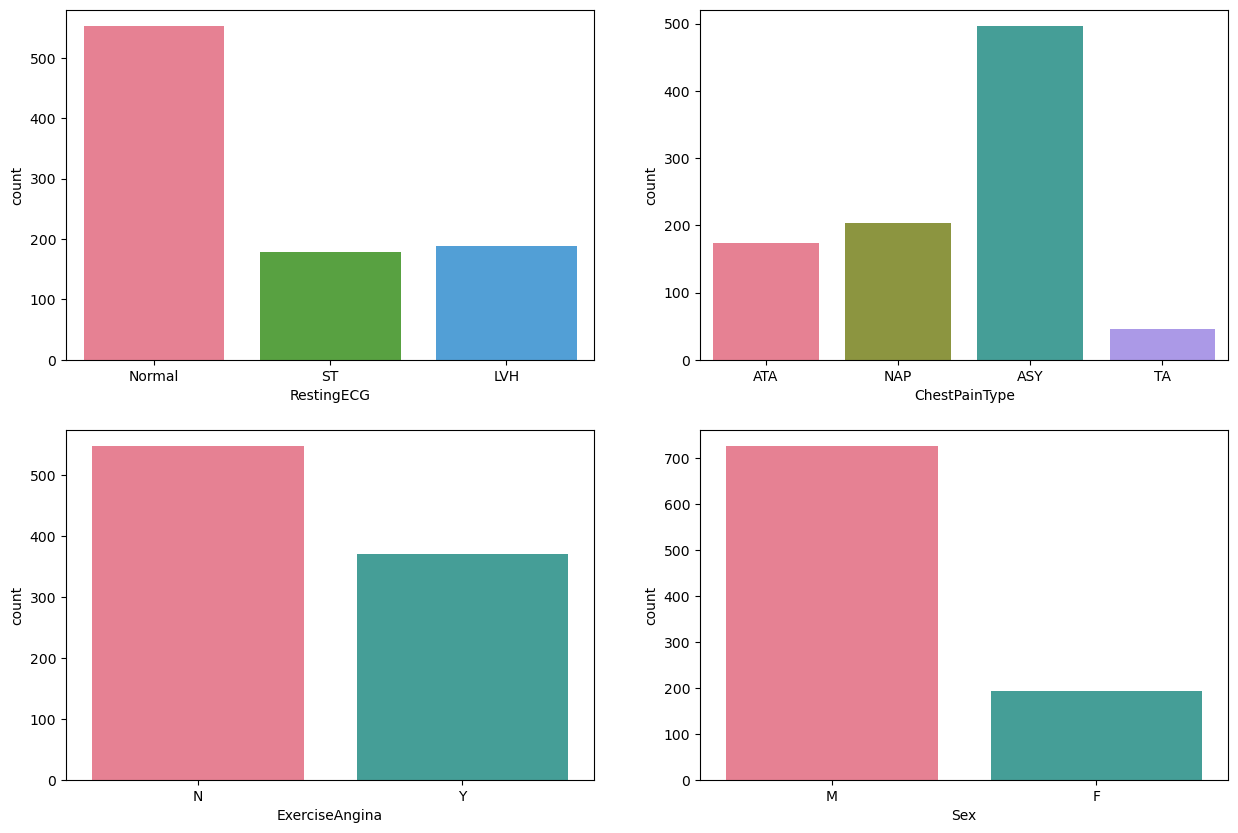

In [102]:
# Plotting the categorical variables on the target
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x = df['RestingECG'], data = df, palette='husl', ax=axes[0,0])
sns.countplot(x = df['ChestPainType'], data = df, palette='husl', ax=axes[0,1])
sns.countplot(x = df['ExerciseAngina'], data = df, palette='husl', ax=axes[1,0])
sns.countplot(x = df['Sex'], data = df, palette='husl', ax=axes[1,1])
plt.show()

In [103]:
# Extracting the numerical columns
num_cols = [feature for feature in df.columns if df[feature].dtypes != '0']

<AxesSubplot:>

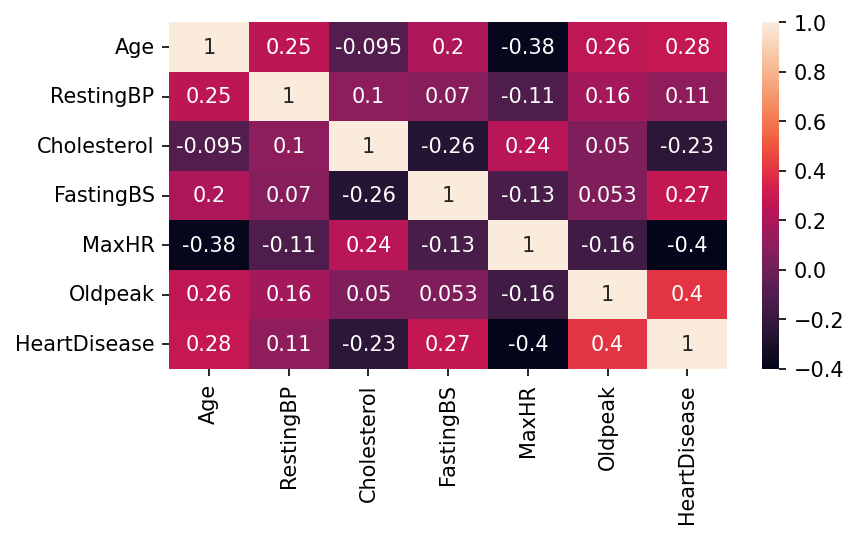

In [104]:
# Plotting a heatmap on the correlation values
plt.figure(figsize=(6,3),dpi=150)
sns.heatmap(df.corr(), annot=True)

In [105]:
# Finding the best correlation with the 'HeartDisease' column
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

### Plotting the distributions of numerical variables

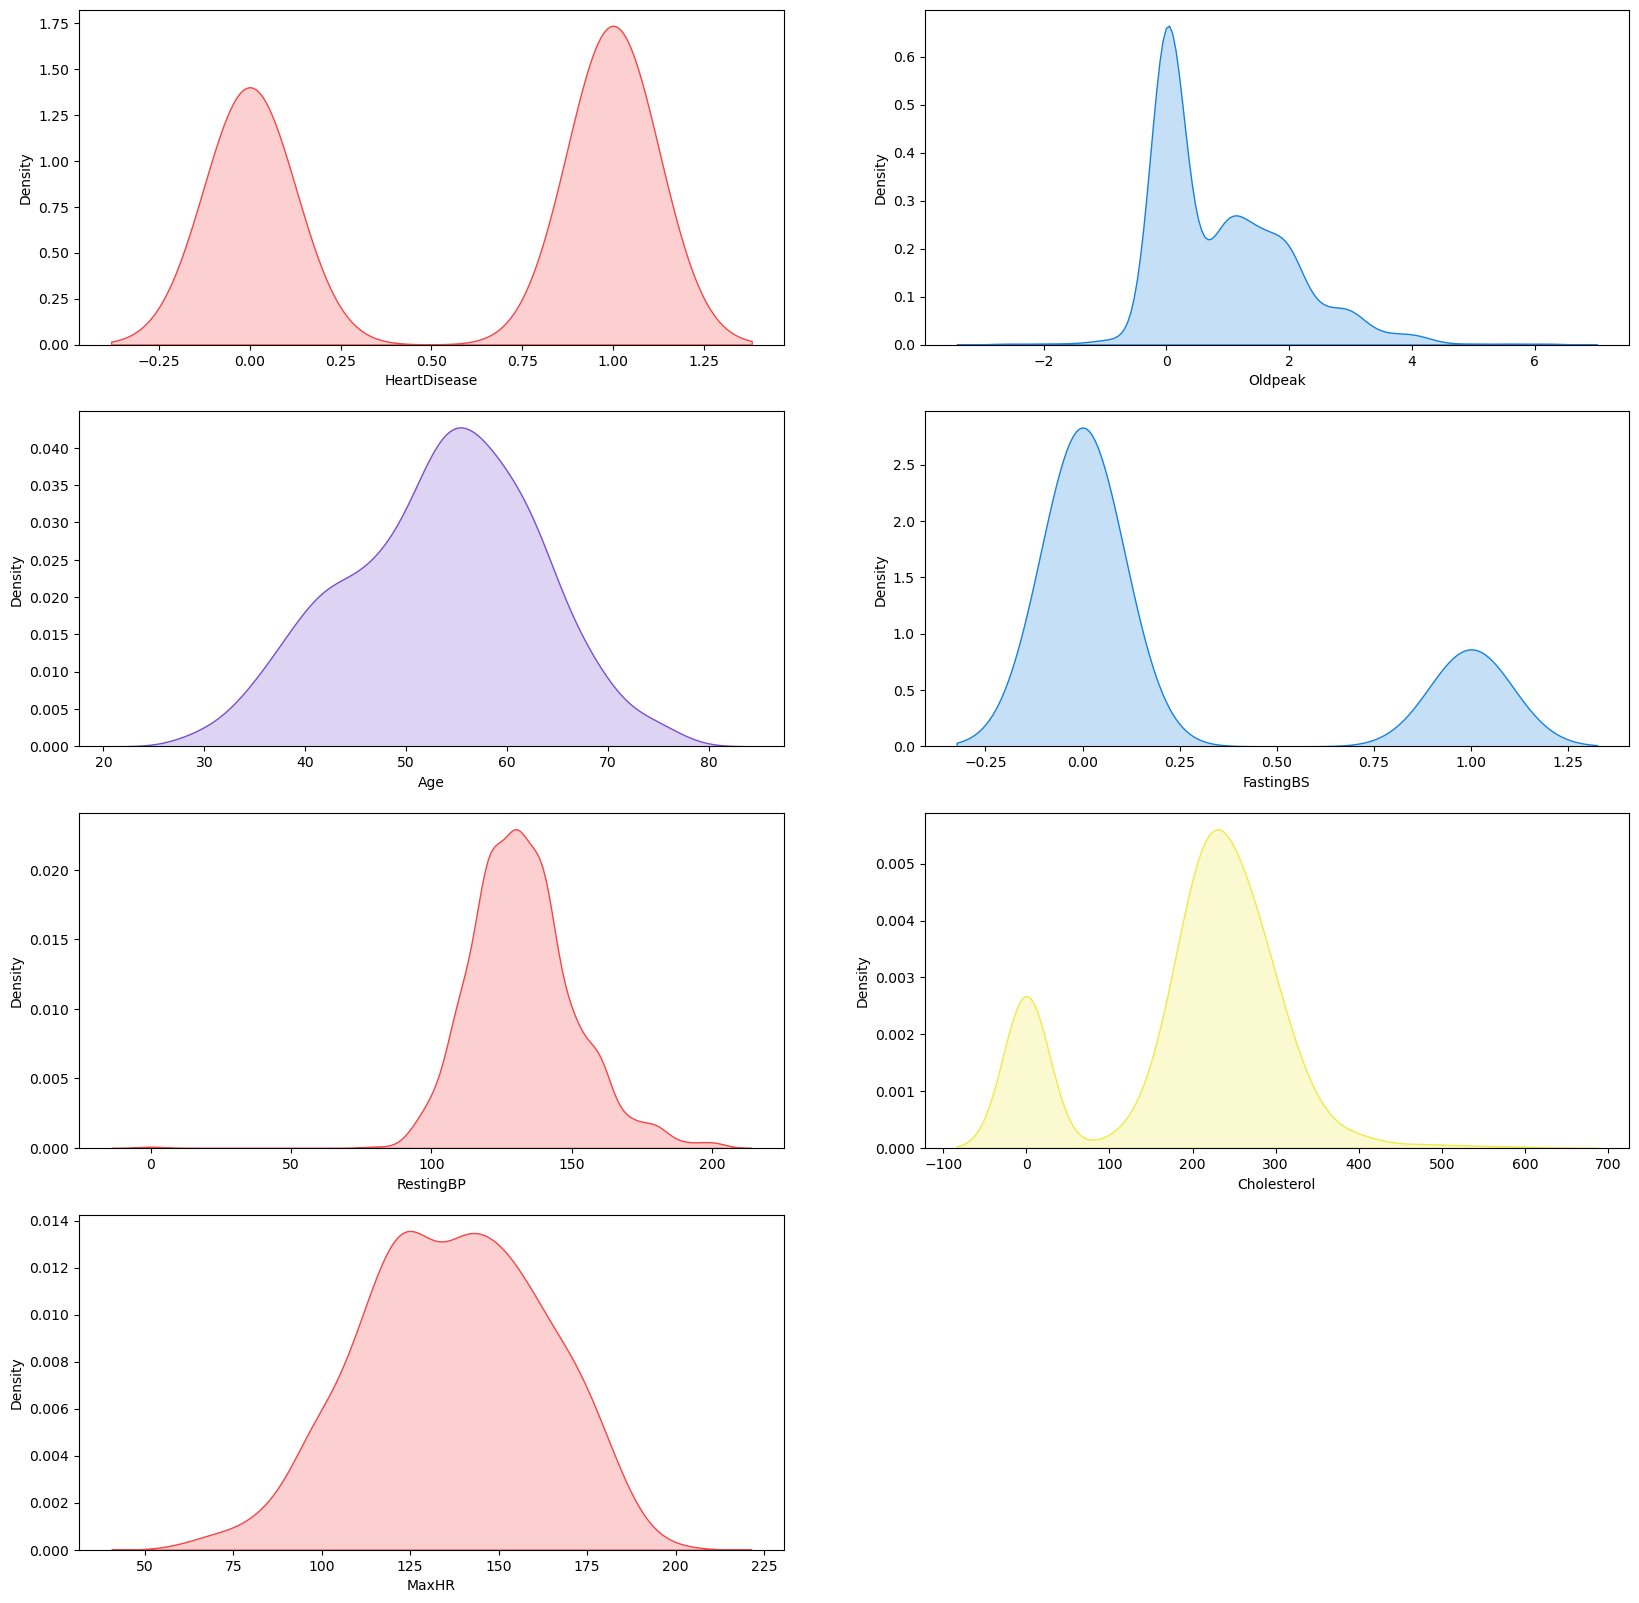

In [106]:
color_plot = ['#de972c','#74c91e','#1681de','#e069f5','#f54545','#f0ea46','#7950cc']
fig, ax = plt.subplots(4,2,figsize=(20,20))
sns.kdeplot(df['HeartDisease'],color=np.random.choice(color_plot), ax=ax[0][0], shade=True)
sns.kdeplot(df['Oldpeak'],color=np.random.choice(color_plot), ax=ax[0][1], shade=True)
sns.kdeplot(df['Age'],color=np.random.choice(color_plot), ax=ax[1][0], shade=True)
sns.kdeplot(df['FastingBS'],color=np.random.choice(color_plot), ax=ax[1][1], shade=True)
sns.kdeplot(df['RestingBP'],color=np.random.choice(color_plot), ax=ax[2][0], shade=True)
sns.kdeplot(df['Cholesterol'],color=np.random.choice(color_plot), ax=ax[2][1], shade=True)
sns.kdeplot(df['MaxHR'],color=np.random.choice(color_plot), ax=ax[3][0], shade=True)
fig.delaxes(ax[3][1])

In [107]:
# Encoding the features using get dummies method
df = pd.get_dummies(df)

### Building the model

In [108]:
# Preparing the dataset for training
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV

In [110]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [111]:
# Scaling the features using pipeline
pipeline = Pipeline([('std_scaler',StandardScaler())])
scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)

In [112]:
# Fitting themodel on SVC with default parameters
model_svc = SVC()
model_svc.fit(scaled_X_train, y_train)

SVC()

In [113]:
# checking the default parameters in an SVC
model_svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [114]:
# Calculating predictions and accuracy score
pred_svc = model_svc.predict(scaled_X_test)
accuracy_score(y_test,pred_svc)

0.8840579710144928

In [115]:
# Building classification report
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87       125
           1       0.87      0.93      0.90       151

    accuracy                           0.88       276
   macro avg       0.89      0.88      0.88       276
weighted avg       0.89      0.88      0.88       276



### We get an accuracy of 88% without tuning the hyperparameters. So let's try tuning the hyperparameters and check if it improves our accuracy.

### Hyperparameter Tuning with GridSearchCV

In [116]:
svm = SVC()
# param_grid = {'C':[0.01,0.05,0.1,1,10,100,1000],'kernel':['linear','rbf'],'gamma':['scale',auto]}
param_grid = {'C':[0.1 ,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf','linear']}
grid = GridSearchCV(svm,param_grid)

In [117]:
# Fitting the model
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [118]:
# Calculating accuracy of tunned model
grid_svc = grid.predict(scaled_X_test)
accuracy_score(y_test, grid_svc)

0.8913043478260869

In [119]:
# Classification report for the tuned model
print(classification_report(y_test, grid_svc))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       125
           1       0.90      0.91      0.90       151

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



#### we get an accuracy of 89% with hyperparameter tunning, accounting for 0.7% increase in accuracy.

# Best Parameters

In [120]:
print(grid.best_params_)
print(grid.best_estimator_.get_params())

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#### The best parameters in this model is: C=100, gamma = 0.001, kernel:rbf